# Event-based Lunar OPtical flow Egomotion estimation (ELOPE)
## Data Preparation
### Data Download

In [ ]:
import os
import subprocess
import shutil
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import cv2
import zipfile
from trajEstimaton import TrajEstimator

In [8]:
zip_dataset_paths = ["files-archive", "elope_dataset.zip"]
dataset_path = "data/"

# Check if 'files-archive' exists
if not os.path.isfile(zip_dataset_paths[0]):
    subprocess.run(["zenodo_get", "15421707"], check=True)

# Check if 'elope_dataset.zip' exists
if not os.path.isfile(zip_dataset_paths[1]) and not os.listdir(dataset_path):
    if os.name == "posix":  # Linux
        subprocess.run(["unzip", zip_dataset_paths[0]], check=True)
    elif os.name == "nt":  # Windows
        extract_dir = os.path.dirname(zip_dataset_paths[0]) or "."
        # Rozpakuj ZIP
        with zipfile.ZipFile(zip_dataset_paths[0], 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

os.makedirs(dataset_path, exist_ok=True)

if os.path.isfile(zip_dataset_paths[1]):
    shutil.move(zip_dataset_paths[1], os.path.join(dataset_path, zip_dataset_paths[1]))

# If 'elope_dataset.zip' exists, unzip it
if os.path.isfile(os.path.join(dataset_path, zip_dataset_paths[1])):
    if os.name == "posix":  # Linux
        subprocess.run(["unzip", os.path.join(dataset_path, zip_dataset_paths[1]), "-d", dataset_path], check=True)
    elif os.name == "nt":  # Windows
        zip_path = os.path.join(dataset_path, zip_dataset_paths[1])
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
try:
    os.remove(os.path.join(dataset_path, zip_dataset_paths[1]))
except FileNotFoundError:
    print(zip_dataset_paths[1] + ": already deleted")

train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

elope_dataset.zip: already deleted


Loaded LanderData from: data/train/0003.npz
Events: 6635805 entries
Timestamps: 120 entries
Trajectory: 120 entries
IMU: 120 entries
Rangemeter: 477 entries


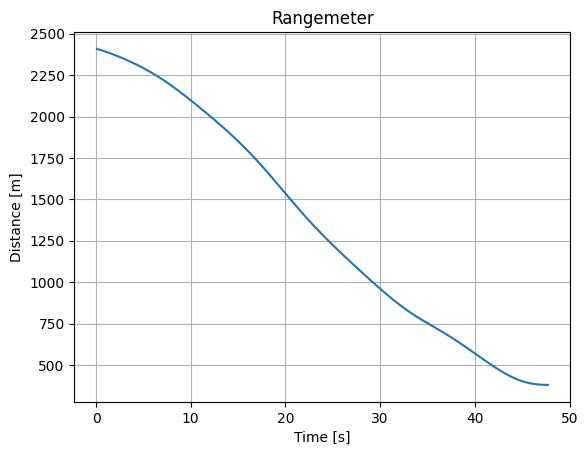

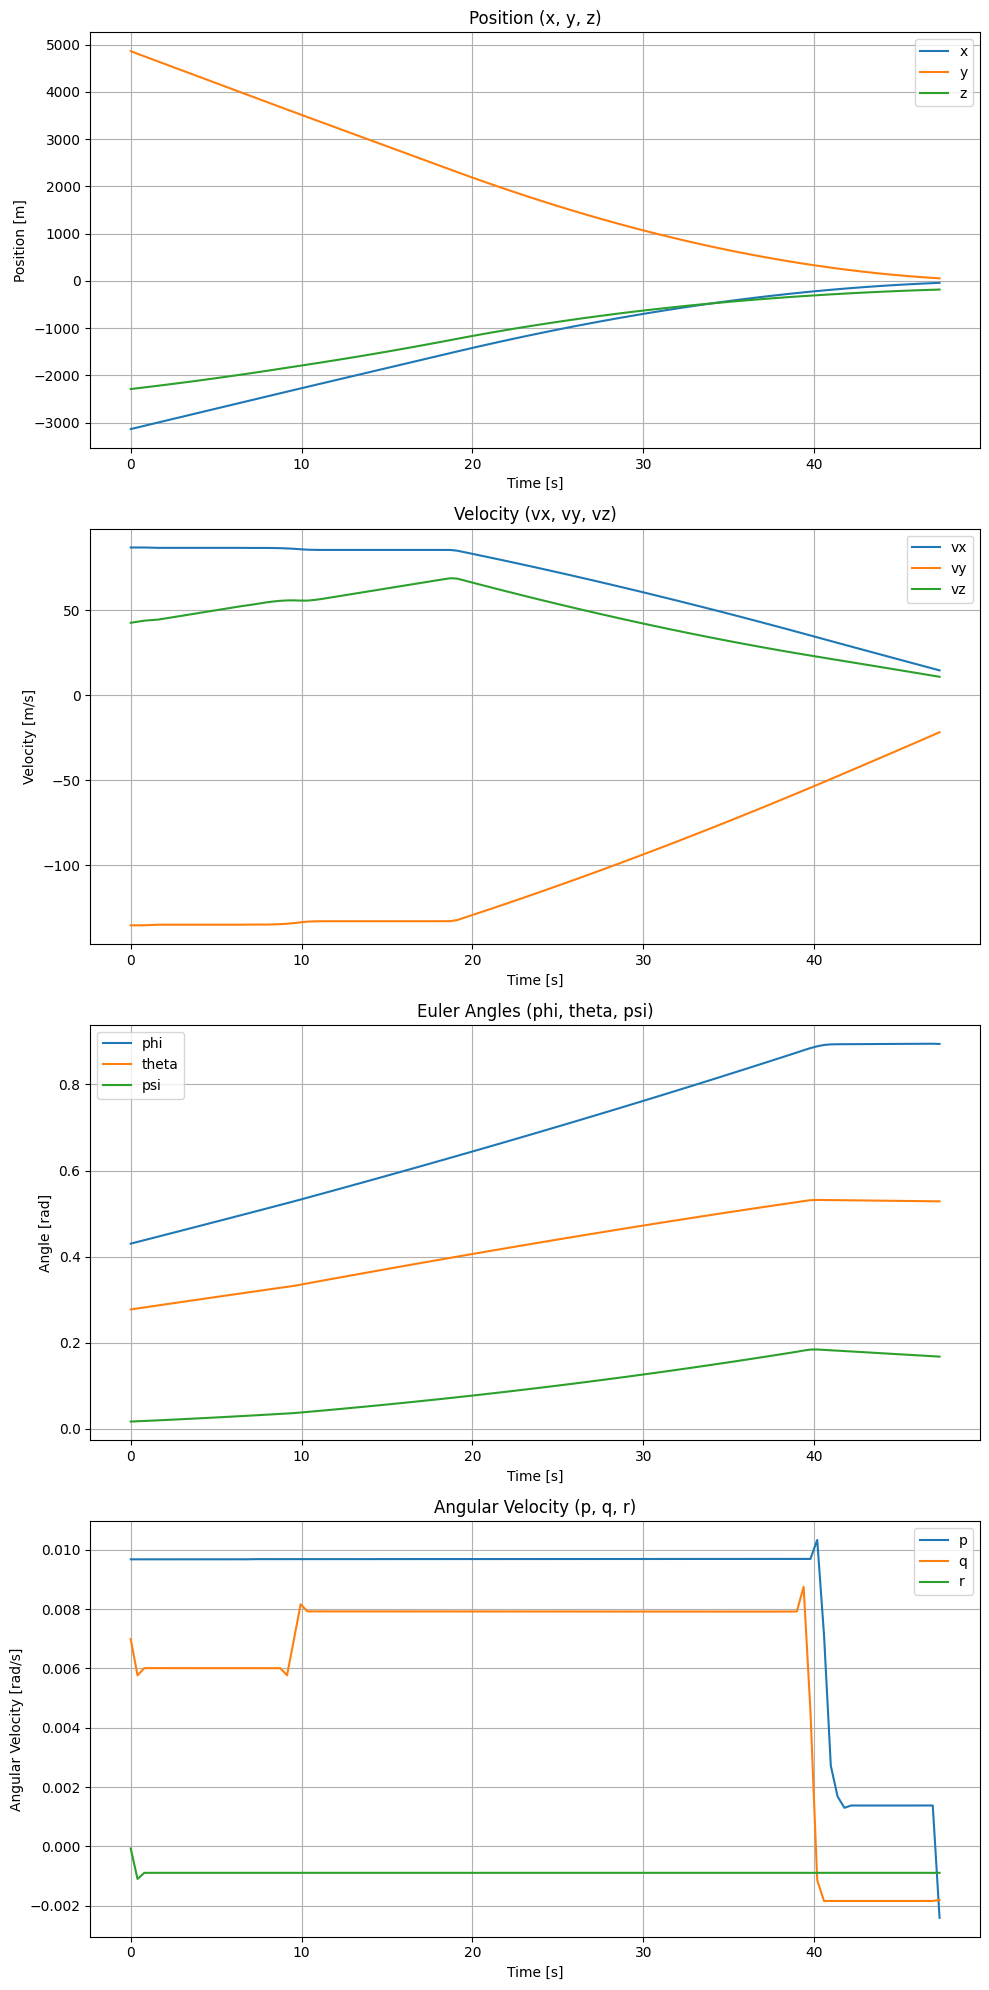

User exited with 'q'.

Displayed 3 event frames.


In [3]:
from dataVisualization import LanderData

landerData = LanderData("data/train/0003.npz")
landerData.summary()
landerData.plot_rangemeter()
landerData.plot_trajectory()
landerData.display_event_frames(tau=0.25, wait=100)

To są wartości ogniskowych dla różnych soczewek na podstawie FOV z dokumentacji DAVIS240, dla obrazu 200x200. Te ogniskowe nie równe są dlatego że w DAVIS240 jest obraz 240x180 i dla takiej wartości jest podane FOV dla x i y. Pewnie dla dobrej rozdzielczości wyszłyby równe. Obojętnie, bo fy i tak nie używamy nigdzie - te funkcje z OpenCV przyjmują jeden parametr focal

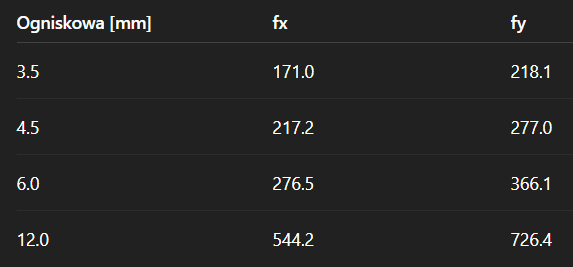

Loaded LanderData from: data/train/0001.npz
Events: 4602975 entries
Timestamps: 120 entries
Trajectory: 120 entries
IMU: 120 entries
Rangemeter: 486 entries


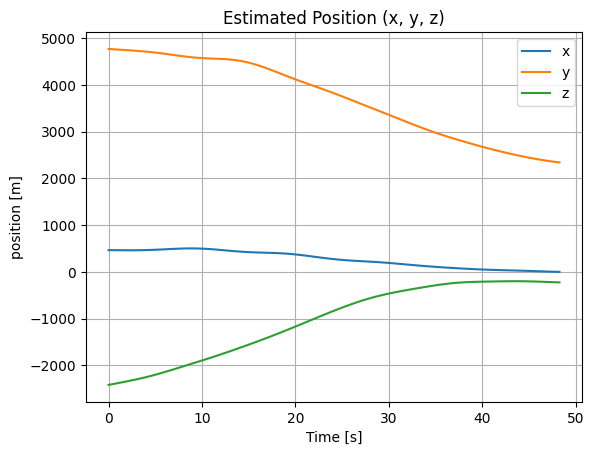

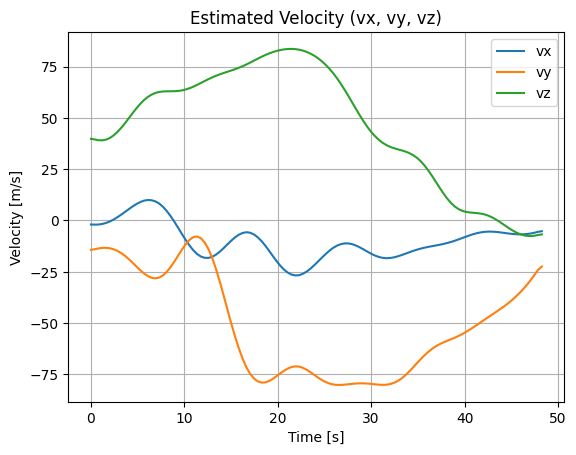

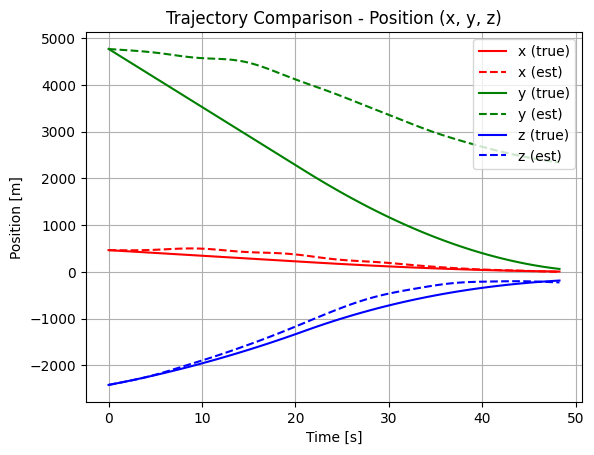

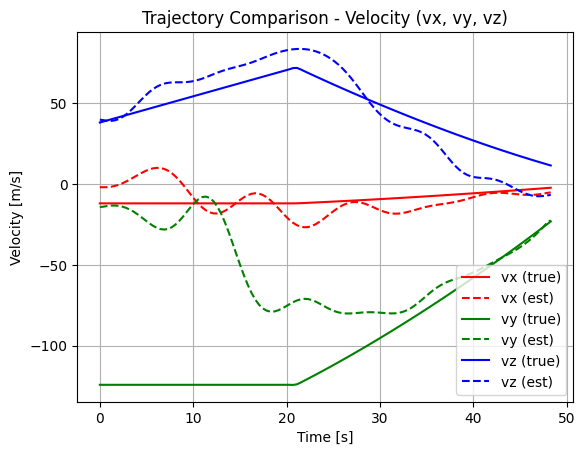

0.04928064766744612


In [5]:
from trajEstimaton import TrajEstimator

params = [3.330e02, 2.770e02, 100, 100, 1.86236316, 0.33]
# cx i cy raczej ustawmy na sztywno na 100 bez uwzględniania w optymalizowaniu, fy jest nieużywane - też lepiej nie uwzględniać
# Jakbyś miał jeszcze odpalać tę optymalizację, to możesz dodać do niej jeszcze TrajEstimator(output_filter_cotoff) w zakresie powiedzmy od 0.04 do 0.3
estimator = TrajEstimator(
    "data/train/0001.npz",
    filter_output_pose=True,
    fx=params[0],
    fy=params[1],
    cx=params[2],
    cy=params[3],
    vertical_scaling_factor=params[4],
    # output_filter_cutoff=0.07,
    filter_rangemeter=True
)
estimator.summary()
# estimator.display_event_frames()
cost = estimator.process_event_frames(tau=params[5])
estimator.plot_estimated_trajectory()
estimator.compare_trajectory()
# estimator.save_result()

print(cost)

In [1]:
from trajEstimaton import TrajEstimator
import json
import numpy as np

## Writing submission file
May take a long time

In [3]:
params = [3.330e02, 2.770e02, 100, 100, 1.86236316, 0.53]  # Optimal parameters - fx, fy, cx, cy, scaling_factor, tau

bogus = dict()
costs = list()
for sequence_id in range(28, 93):
    print(f"Processing data/test/{sequence_id:04d}.npz...")
    estimator = TrajEstimator(
        f"data/test/{sequence_id:04d}.npz",
        filter_output_pose=True,
        fx=params[0],
        fy=params[1],
        cx=params[2],
        cy=params[3],
        vertical_scaling_factor=params[4],
        # output_filter_cutoff=0.06,
    )
    cost = estimator.process_event_frames(tau=params[5])
    costs.append(cost)
    # estimator.save_result()
    vx = estimator.estimated_trajectory["velocity"][:,0]
    vy = estimator.estimated_trajectory["velocity"][:,1]
    vz = estimator.estimated_trajectory["velocity"][:,2]

    bogus[sequence_id] = {"vx": vx.tolist(), "vy": vy.tolist(), "vz": vz.tolist()}

# writing submission-file to drive
with open('bogus_submission.json', 'wt') as f:
    json.dump(bogus, f)

Processing data/test/0028.npz...
Processing data/test/0029.npz...
Processing data/test/0030.npz...
Processing data/test/0031.npz...
Processing data/test/0032.npz...
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 2)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 16)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 32)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 34)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 38)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 39)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! O

## Test on all train data to get train dataset public score

In [ ]:
params = [3.330e02, 2.770e02, 100, 100, 1.86236316, 0.53]  # Public score: 0.07724387362914267
params = [3.330e02, 2.770e02, 100, 100, 1.86236316, 0.53]  # Optimal parameters - fx, fy, cx, cy, scaling_factor, tau

costs = list()
for sequence_id in range(0, 28):
    print(f"Processing data/train/{sequence_id:04d}.npz...")
    estimator = TrajEstimator(
        f"data/train/{sequence_id:04d}.npz",
        filter_output_pose=True,
        fx=params[0],
        fy=params[1],
        cx=params[2],
        cy=params[3],
        vertical_scaling_factor=params[4],
        # output_filter_cutoff=0.06,
    )
    cost = estimator.process_event_frames(tau=params[5])
    costs.append(cost)
    # estimator.save_result()

# Public score
score = np.mean(costs)
print(f"Public score: {score}") 

Processing data/train/0000.npz...
Processing data/train/0001.npz...
Processing data/train/0002.npz...
Processing data/train/0003.npz...
Processing data/train/0004.npz...
Processing data/train/0005.npz...
Processing data/train/0006.npz...
Processing data/train/0007.npz...
Processing data/train/0008.npz...
Processing data/train/0009.npz...
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 34)!
Processing data/train/0010.npz...
Processing data/train/0011.npz...
Processing data/train/0012.npz...
Processing data/train/0013.npz...
Processing data/train/0014.npz...
Processing data/train/0015.npz...
Processing data/train/0016.npz...
Processing data/train/0017.npz...
Processing data/train/0018.npz...
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current frame (frame id: 2)!
[VisualOdometry.processFrame] Warning: Essetial matrix not found - to few keypoints! Ommitting current fr